Task 1-Stock Price Prediction Using LSTM
This project aims to develop a prediction model to predict the stock prices of the Google company using LSTM (Long Short Term Memory) Neural Network.
Dataset of Google is taken for Prediction

## Importing the Libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import KFold

## Load the dataset and Data Preprocessing

In [30]:
# Load the CSV data into a pandas DataFrame
google_data = pd.read_csv(r"C:\Users\Admin\Downloads\Bharat Intern\Task 1 - Stock Prediction\GOOGL.csv")

## Checking any Missing Values

In [31]:
google_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [32]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4763 entries, 0 to 4762
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4763 non-null   object 
 1   Open          4763 non-null   float64
 2   High          4763 non-null   float64
 3   Low           4763 non-null   float64
 4   Close         4763 non-null   float64
 5   Volume        4763 non-null   int64  
 6   Dividends     4763 non-null   float64
 7   Stock Splits  4763 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 297.8+ KB


In [33]:
## Statistical Measures
google_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4763.000000,4763.000000,4763.000000,4763.000000,4.763000e+03,4763.0,4763.000000
mean,39.762061,40.179887,39.341565,39.769850,1.223242e+08,0.0,0.004619
std,36.434451,36.850922,36.030286,36.448726,1.503214e+08,0.0,0.291231
min,2.482232,2.546046,2.401401,2.502753,9.312000e+06,0.0,0.000000
25%,12.784910,12.929304,12.673673,12.792167,3.260720e+07,0.0,0.000000
50%,26.577499,26.832500,26.340500,26.605499,6.690503e+07,0.0,0.000000
75%,56.107248,56.778250,55.587502,56.147001,1.489289e+08,0.0,0.000000
max,151.250000,151.546494,148.899002,149.838501,1.643023e+09,0.0,20.000000


In [34]:
## Convert the 'Date' column to a datetime object
google_data['Date'] = pd.to_datetime(google_data['Date'])

In [35]:
## Sort the data by date
google_data.sort_values('Date', inplace=True, ascending=True)

In [36]:
## Extract the 'Close' prices as the target variable for prediction
target = google_data['Close'].values

## Scale the data to values between 0 and 1

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target.reshape(-1, 1))

## Data Sequencing for LSTM Input

In [38]:
## Define the number of previous days to use for prediction
look_back = 60

In [39]:
## Create sequences of data for LSTM input
X, y = [], []
for i in range(len(target_scaled) - look_back):
    X.append(target_scaled[i:i + look_back])
    y.append(target_scaled[i + look_back])

In [40]:
## Convert the data to numpy arrays
X = np.array(X)
y = np.array(y)

## Train-Test Split

In [41]:
## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and Train the LSTM Model

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [43]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

## Model Evaluation

In [45]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {loss}")

Mean Squared Error on Test Data: 7.497714250348508e-05


## Get Predictions and Inverse Scaling

In [46]:
# Get predictions on the test data
predictions_scaled = model.predict(X_test)

30/30 [==============================] - 1s 11ms/step


In [47]:
# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions_scaled)

In [48]:
# Print the first few predictions
print("Predicted Stock Prices:")
print(predictions[:5])

Predicted Stock Prices:
[[115.55582 ]
 [ 29.8495  ]
 [ 26.289663]
 [ 12.258369]
 [ 56.291973]]


In [49]:
# Print the actual stock prices for comparison
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
print("\nActual Stock Prices:")
print(actual_prices[:5])


Actual Stock Prices:
[[113.12349701]
 [ 29.65699959]
 [ 25.81456566]
 [ 11.75951004]
 [ 55.60250092]]


## Visualization

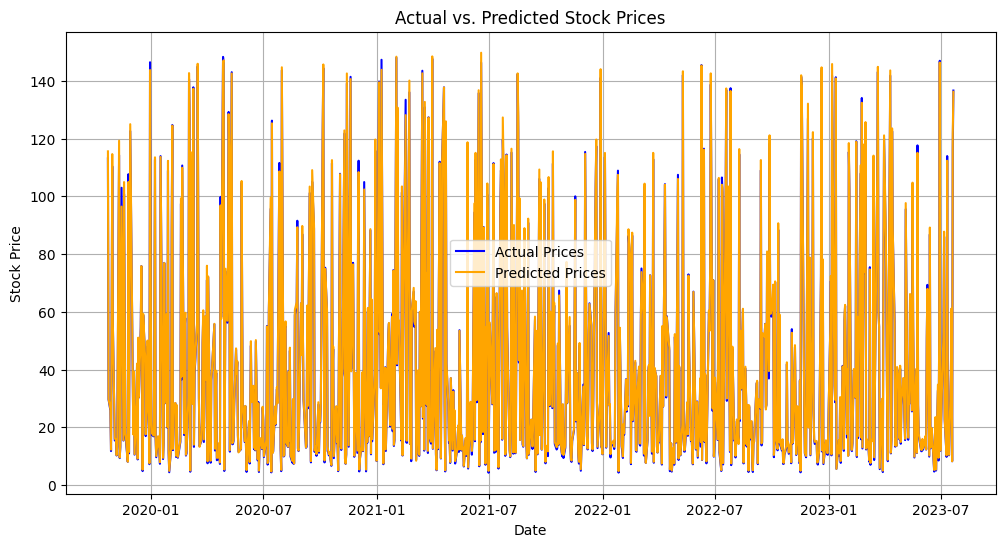

In [50]:
import matplotlib.pyplot as plt
# Plot the Actual vs. Predicted Stock Prices
plt.figure(figsize=(12, 6))
plt.plot(google_data['Date'].tail(len(predictions)), actual_prices, label='Actual Prices', color='blue')
plt.plot(google_data['Date'].tail(len(predictions)), predictions, label='Predicted Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

## MSE,MAE,R2 actual prices and predictions

In [52]:
mse = mean_squared_error(actual_prices, predictions)
mae = mean_absolute_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)

print(f"\nMean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.6275900720955017
Mean Absolute Error: 0.8253092897559071
R-squared: 0.9988681282769863


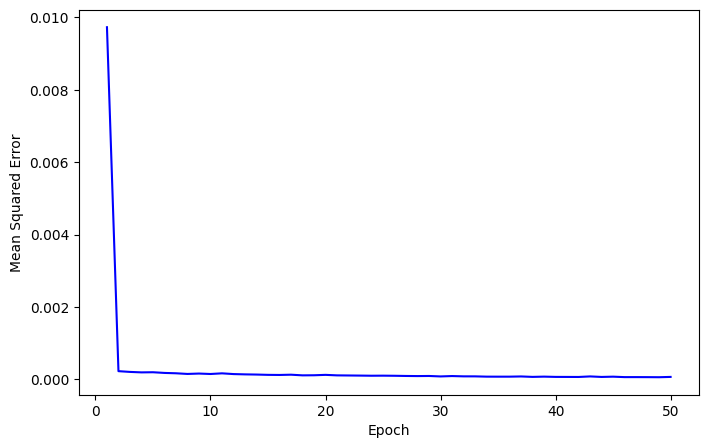

In [53]:
# Check for overfitting by comparing training and validation loss curves
train_loss = history.history['loss']
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

## Use cross-validation for better evaluation

In [54]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model_cv = Sequential()
    model_cv.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
    model_cv.add(Dense(1))
    model_cv.compile(loss='mean_squared_error', optimizer='adam')

    history_cv = model_cv.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    predictions_cv = model_cv.predict(X_val)
    predictions_cv = scaler.inverse_transform(predictions_cv)

    mse_cv = mean_squared_error(scaler.inverse_transform(y_val), predictions_cv)
    cv_mse_scores.append(mse_cv)

print(f"\nCross-Validation MSE Scores: {cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {np.mean(cv_mse_scores)}")

30/30 [==============================] - 1s 10ms/step

Cross-Validation MSE Scores: [1.2544658434650304, 1.3675262711432994, 1.2370234089678878, 1.5811220193339088, 1.3104095490455328]
Mean Cross-Validation MSE: 1.3501094183911317


Conclusion:

Based on the Cross-Validation results and the comparison of Actual and Predicted Stock Prices, it can be concluded that the LSTM model appears to be performing well for the given stock price prediction task. The model shows consistency in its performance across different data subsets (as seen in Cross-Validation), and the plot of actual vs. predicted stock prices demonstrates that the model captures the stock price trends effectively